In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

<ipython-input-4-76b76ec4e28e>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [18]:
#Data Generate X,Y
def generateDataset(m):
    X=np.random.randn(m)*10
    noise=np.random.randn(m)
    y=3*X+1+5*noise
    return X,y


In [19]:
X,y=generateDataset(100)


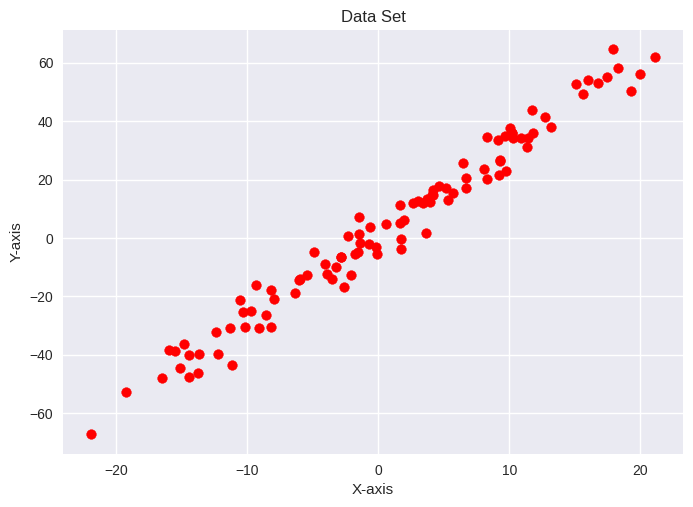

In [20]:
def plotData(X,y,color="red",title="Data Set"):
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.scatter(X,y,c=color)
    plt.show


plotData(X,y)

In [21]:
def normaliseData(X):
    X=(X-X.mean())/X.std()
    return X


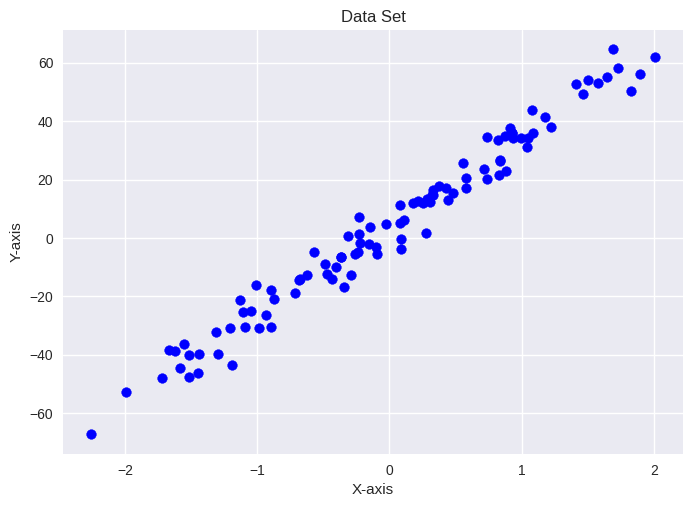

In [22]:
X=normaliseData(X)
plotData(X,y,color="Blue")

In [23]:
#Split the data for training and testing then train the data for the data values till split and then test the on the unseen data
def trainTestSplit(X,y,split=0.8):
  m=X.shape[0] #gives no of samples we have
  data=np.zeros((m,2)) #we want to shuffle at the same time we want to make sure X and y remain intact (generally X is matrix y is vector which may in further part so you we are just following such labeling)

  data[:,0]=X
  data[:,1]=y

  np.random.shuffle(data)
  split=int(m*split) #to get row no till we are considering for training

  #training data
  XT=data[ :split,0] # 0 to 79 in these case
  yT=data[ :split,1] # 0 to 79

  #testing data
  Xt=data[split: ,0]
  yt=data[split: ,1]

  return XT,yT,Xt,yt


In [24]:
XT,yT,Xt,yt = trainTestSplit(X,y)

In [25]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


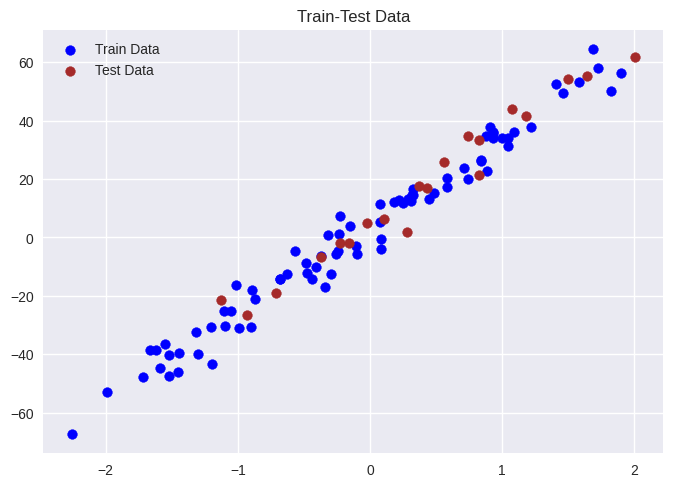

In [26]:
plt.scatter(XT,yT,color='blue',label="Train Data")
plt.scatter(Xt,yt,color='brown',label="Test Data")
plt.title("Train-Test Data")
plt.legend()
plt.show()

In [31]:
#Building Regression model
#Hypothesis, h(X)=theta not + theta1 * X and X can be either scalar or matrix
#Univariate
#MSE = 1/2m * Summmation i=1 to m (hypothesis - actual y)^2
#y is output vector

import numpy as np
import matplotlib.pyplot as plt

def hypothesis(X, theta):
    return theta[0] + theta[1] * X

def error(X, y, theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_i = hypothesis(X[i], theta)
        e += (y_i - y[i]) ** 2

    return e / (2 * m)

def gradient(X, y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        exp = hypothesis(X[i], theta) - y[i]
        grad[0] += exp
        grad[1] += exp * X[i]

    return grad / m

def train(X, y, learning_rate=0.2):
    theta = np.zeros((2,))  # creating theta vector that stores theta 0 and theta 1
    maxIterations = 100
    errorList = []
    for i in range(maxIterations):
        grad = gradient(X, y, theta)
        errorList.append(error(X, y, theta))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    plt.xlabel("Iteration Number")
    plt.ylabel("Loss")
    plt.plot(errorList)
    return theta

def predict(X,theta):
    return hypothesis(X,theta)

[ 4.09370767 30.03341573]



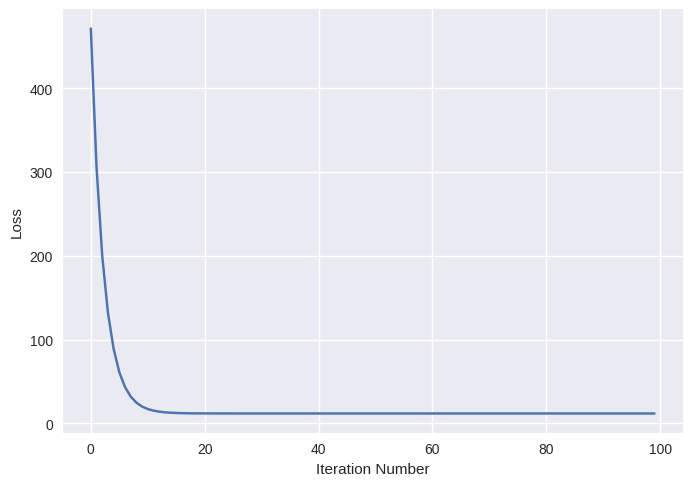

In [32]:
theta = train(X,y)
print(theta)
print()

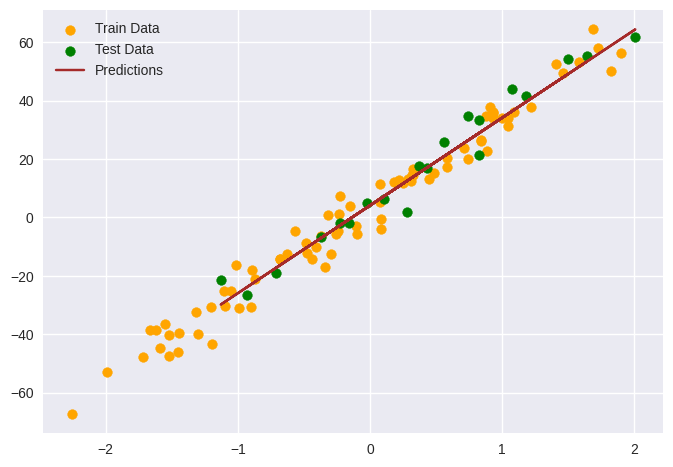

In [33]:
yp = predict(Xt,theta)
plt.scatter(XT,yT,color='orange',label="Train Data")
plt.scatter(Xt,yt,color='green',label='Test Data') #actual
plt.plot(Xt,yp,color='brown',label='Predictions') #predicted
plt.legend()
plt.show()

#Why don't we have test sample beyond x>15 because the last test sample is around 15 only we don't samples after that to test

In [34]:
# Model Evaluation
def r2Score(y,yp):
    ymean = y.mean()
    num = np.sum((y-yp)**2)
    denom = np.sum((y-ymean)**2)
    return 1-num/denom

r2Score(yt,yp)

0.9646708708775

The value J theta depends on theta 0 and theta 1

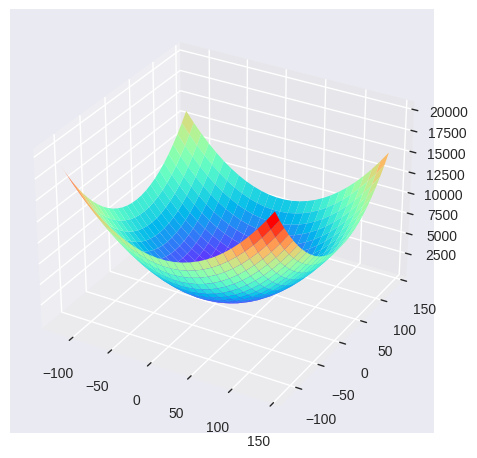

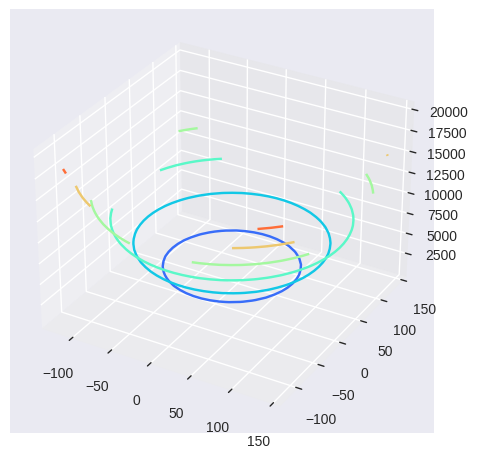

In [38]:
# Visualization: Loss Function J(theta) in 3 Dimensions
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define T0, T1, X, and y (assuming X and y are already defined)
T0 = np.arange(-120, 150, 10)
T1 = np.arange(-120, 150, 10)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i, j] * X + T0[i, j]
        J[i, j] = np.mean((y - yp) ** 2) / 2

# Create the first 3D surface plot
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
plt.show()

# Create the second 3D contour plot
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
plt.show()


In above image the red region denotes the higher loss the blue region denotes lower loss

In [40]:
# Trace the trajectory of gradient
def train(X,y,learning_rate = 0.1,maxItrs = 100):
    theta = np.array([-150,100])
    error_list = []
    # note down values of theta
    theta_list = []

    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    return theta, theta_list, error_list

In [43]:
theta, theta_list, error_list = train(XT,yT)

In [46]:
theta_list = np.array(theta_list)

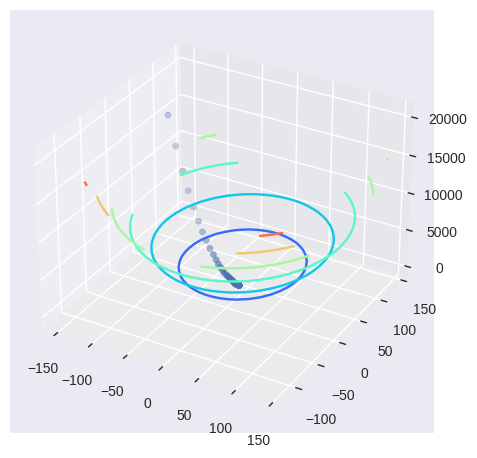

In [47]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

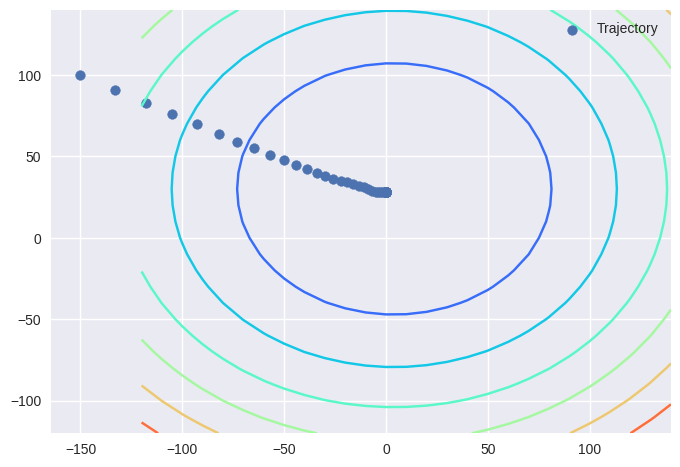

In [48]:
# 2D Contour Plot (Top View)
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],label='Trajectory')
plt.legend()
plt.show()